# 데이터프레임 행, 열 (row, column) 선택 및 필터 하기

## index로 row 필터링
- ### 1번부터 2번 인덱스까지 연속으로 필터링 -> gen_0[1:3]
- ### 0번과 2번 인덱스만 불연속적으로 필터링 -> gen_0[[0,2]]

## index로 column 필터링
- ### iloc(row,column) 활용
    - 모든 행을 출력하고 컬럼은 0번부터 1번 인덱스까지 연속으로 필터링 -> gen_0.iloc[:,0:2]
    - row는 1번부터 3번까지, 컬럼은 0번만 -> gen_0.iloc[1:4,0:1]

## column condition에 따라서 row 필터링
- ### order가 3 이상인 row를 필터링 하고 싶다면? -> gen_0[gen_0.order >= 3]
    - 또는 gen_0.query('order >= 3')
- ### sub(M) 같이 괄호 같은 특수문자가 포함되어 있으면 파이썬이 변수나 함수 호출로 오해하여 에러가 뜰 수 있다.
    - 해결법: 대괄호 표기법 사용 -> gen_0[gen_0['sub(M)'] >= 2.39]
    - query() 메서드를 이용할 때는 컬럼에 괄호가 들어있다면 백틱(`)으로 감싸준다.
        - gen_0.query('`sub(M)` >= 2.39')
- ### 조건 여러 개 넣기
    - name이 mico이고 order가 3인 row를 출력하고 싶을 때
        - gen_0[(gen_0.name == 'mico') & (gen_0.order == 3)]
        - 각 조건별로 괄호를 씌워주고 and는 &, or는 |를 사용
        - 만약 column 이름에 괄호가 들어있다면 대괄호 표기법 적용
            - gen_0[(gen_0.name == 'mico') & (gen_0['sub(M)'] == 2.39)]

## column name filter
- ### column name 중에 order, sub(M)만 보고 싶을 때
    - gen_0_filtered = gen_0[['order', 'sub(M)']]


# 아래는 실제 활용할 데이터로 실습

In [98]:
import pandas as pd
busan_frame = pd.read_excel('../../project/data/전체_도시철도역사정보_20250417(1).xlsx')
pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows') # display.max_rows 기본값 복원
target_lines = ['동해선', '부산 경량도시철도 4호선', '부산김해경전철', '부산 도시철도 1호선', '부산 도시철도 2호선', '부산 도시철도 3호선']
busan_frame_filtered = busan_frame[busan_frame['노선명'].isin(target_lines)] # isin() 메서드를 사용하여 코드 중복 없이 필터링 가능
# 다른 방법: query() 메서드를 사용하여 필터링
# target_lines = ['동해선', '부산 경량도시철도 4호선', '부산김해경전철', '부산 도시철도 1호선', '부산 도시철도 2호선', '부산 도시철도 3호선']
# busan_frame_filtered = busan_frame.query('노선명 in @target_lines')
busan_frame_filtered

,역번호,역사명,노선번호,노선명,영문역사명,한자역사명,환승역구분,환승노선번호,환승노선명,역위도,역경도,운영기관명,역사도로명주소,역사전화번호,데이터기준일자
96,8022,개운포역,I26K6,동해선,Gaeunpo,開雲浦,일반역,NaN,NaN,35.507884,129.316970,한국철도공사,울산시 남구 상개리 97-1,1588-7788,2025-04-08 00:00:00
97,8003,거제역,I26K6,동해선,Geoje,巨 堤,환승역,S2603,부산 도시철도 3호선,35.187900,129.075400,한국철도공사,부산광역시 연제구 거제동 419-2,1588-7788,2025-04-08 00:00:00
98,8002,거제해맞이역,I26K6,동해선,Geojehaemaji,巨堤해맞이,일반역,NaN,NaN,35.182197,129.069315,한국철도공사,부산광역시 연제구 거제동 619-1,1588-7788,2025-04-08 00:00:00
99,8004,교대역,I26K6,동해선,Busan Nat’l Univ. of Edu,敎 大,환승역,S2601,부산 도시철도 1호선,35.195100,129.080000,한국철도공사,부산시 연제구 중앙대로 1196,1588-7788,2025-04-08 00:00:00
100,8013,기장역,I26K6,동해선,Gijang,機 張,일반역,NaN,NaN,35.243027,129.218551,한국철도공사,부산시 기장군 기장읍 차성로288번길 86,1588-7788,2025-04-08 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,0301,수영,S2603,부산 도시철도 3호선,Suyeong,水營,환승역,S2602+S2603,부산 도시철도 2호선+부산 도시철도 3호선,35.167750,129.114580,부산광역시 부산교통공사,부산광역시 수영구 수영로 677,051-678-6301,2022-11-30 00:00:00
882,0312,숙등,S2603,부산 도시철도 3호선,Sukdeung,淑嶝,일반역,NaN,NaN,35.211970,129.012750,부산광역시 부산교통공사,부산광역시 북구 만덕대로 지하 79,051-678-6312,2022-11-30 00:00:00
883,0305,연산,S2603,부산 도시철도 3호선,Yeonsan,蓮山,환승역,S2601+S2603,부산 도시철도 1호선+부산 도시철도 3호선,35.186140,129.081470,부산광역시 부산교통공사,부산광역시 연제구 연산동 1515-1번지,051-678-6305,2022-11-30 00:00:00
884,0307,종합운동장,S2603,부산 도시철도 3호선,Sports Complex,綜合運動場,일반역,NaN,NaN,35.191250,129.067500,부산광역시 부산교통공사,부산광역시 연제구 아시아드대로 지하 73,051-678-6307,2022-11-30 00:00:00


# .shp 파일 geopandas로 열어보기
## 문제점: .shp 파일을 실행하여 지도를 보는 것까지는 성공했으나 내가 아는 위도/경도로 표시되지 않고 10만 단위로 좌표가 보임
- ### 지도 데이터에 좌표 참조 시스템(Coordinate Reference System, CRS)이라는 체계가 있다는 걸 처음 알게 됨
- ### 현재 파일의 CRS는 5186으로 표기됨
- ### 위도, 경도로 보기 위해 CRS를 4326으로 변환 후 다시 출력

현재 CRS: EPSG:5186
               minx           miny           maxx           maxy
0     384947.412219  280681.671969  385260.612651  281101.599125
1     386250.506143  280898.155488  386816.783585  281546.094993
2     385191.598099  280467.711988  385538.084718  281159.336455
3     384697.403834  279657.976298  385906.912408  280749.448748
4     384879.285761  281068.059580  385595.219712  281850.794350
...             ...            ...            ...            ...
3072  406213.473842  309492.954243  406386.102346  309565.808004
3073  405874.306575  306441.550168  406133.120476  306661.926969
3074  399537.528289  304993.816634  399545.217297  304995.461354
3075  398416.879814  304970.417207  398680.332017  305199.439870
3076  402114.968540  296054.328208  402192.276610  296313.933275

[3077 rows x 4 columns]
변환된 CRS: EPSG:4326
            minx       miny        maxx       maxy
0     129.028453  35.105481  129.031913  35.109224
1     129.042774  35.107195  129.049078  35.112978
2    

<Axes: >

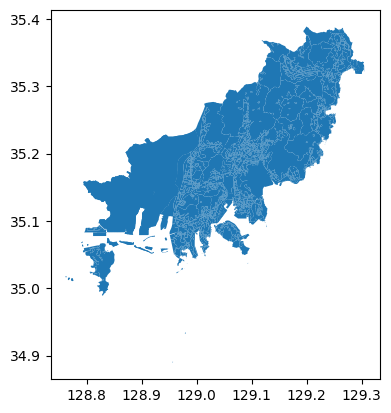

In [101]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
gdf = gpd.read_file('../../project/data/국토계획(도시지역)(부산)/LSMD_CONT_UQ111_26_202505.shp')
print("현재 CRS:", gdf.crs)
print(gdf.geometry.bounds)
gdf = gdf.to_crs('EPSG:4326')
print("변환된 CRS:", gdf.crs)
print(gdf.geometry.bounds)
gdf.plot()